In [ ]:
#  1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os
import zipfile


In [ ]:
#  2. Extract the CSV from ZIP
with zipfile.ZipFile("Global_Superstore2.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
#  3. Load the Dataset
df = pd.read_csv("Global_Superstore2.csv", encoding='latin1')  # Use 'latin1' if UTF-8 fails
print("✅ Dataset Loaded Successfully!")
print(df.head())

✅ Dataset Loaded Successfully!
   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0

In [29]:
# 4. cleaning data
# ✂ Remove Duplicates
df.drop_duplicates(inplace=True)

#  Handle Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)

#  Outlier Removal using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]

# Filter only if column exists
for col in ['Sales', 'Profit']:
    if col in df.columns:
        df = remove_outliers_iqr(df, col)

print("✅ Cleaned Data Shape:", df.shape)

✅ Cleaned Data Shape: (37703, 24)


In [30]:
# 5. Descriptive Statistics
print("\n Summary Statistics:\n")
print(df.describe())

if 'Sales' in df.columns and 'Profit' in df.columns:
    correlation = df[['Sales', 'Profit']].corr()
    print("\n🔗 Correlation between Sales and Profit:\n", correlation)


 Summary Statistics:

             Row ID   Postal Code         Sales      Quantity      Discount  \
count  37703.000000  37703.000000  37703.000000  37703.000000  37703.000000   
mean   25923.516776  56319.693486     88.494541      3.095297      0.128470   
std    14998.024398  14667.889750    100.037706      2.021151      0.201124   
min        1.000000   1040.000000      0.444000      1.000000      0.000000   
25%    12623.000000  56430.500000     22.620000      2.000000      0.000000   
50%    26403.000000  56430.500000     51.312000      3.000000      0.000000   
75%    39004.500000  56430.500000    114.390000      4.000000      0.200000   
max    51290.000000  99301.000000    581.250000     14.000000      0.800000   

             Profit  Shipping Cost  
count  37703.000000   37703.000000  
mean      10.755792       9.595497  
std       19.514843      14.107418  
min      -40.020000       0.000000  
25%        0.771600       1.880000  
50%        7.200000       4.720000  
75%   

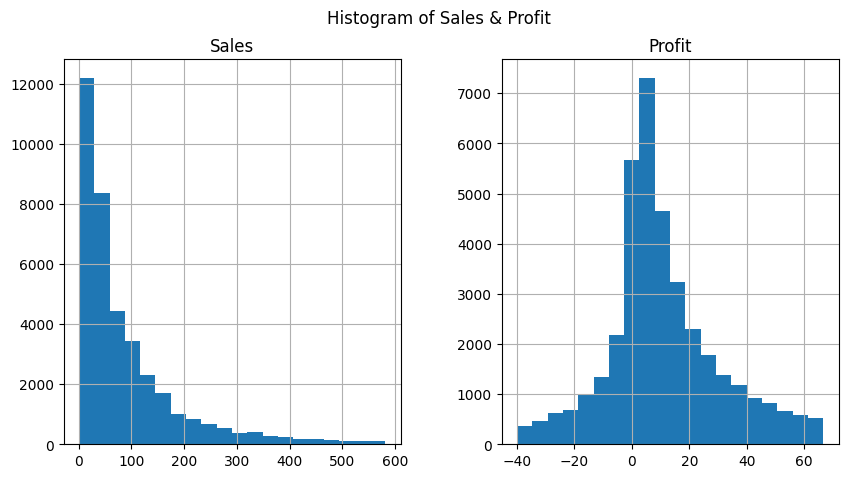

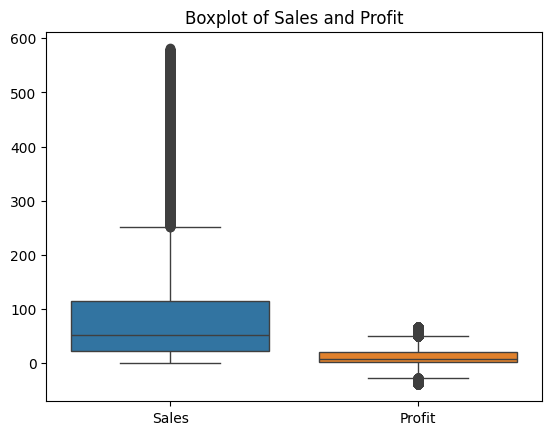

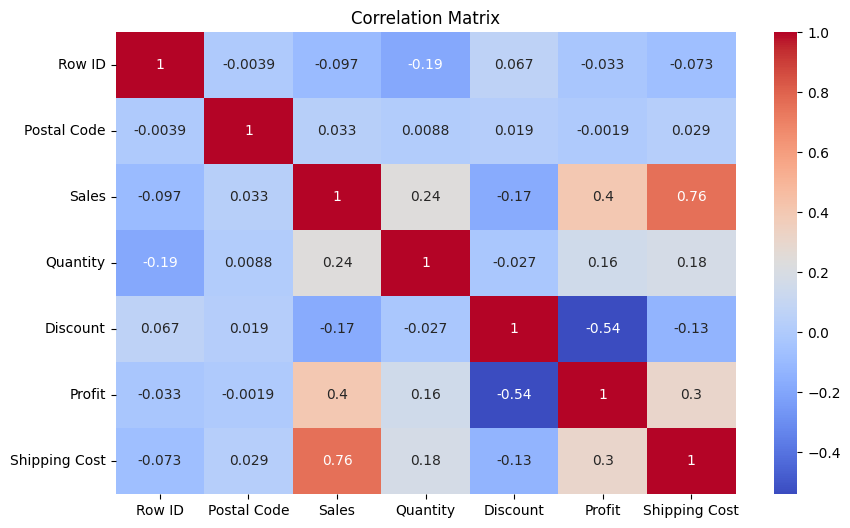

In [31]:
# 6. Visualizations
#  Histogram
df[['Sales', 'Profit']].hist(bins=20, figsize=(10, 5))
plt.suptitle('Histogram of Sales & Profit')
plt.show()

#  Boxplot
sns.boxplot(data=df[['Sales', 'Profit']])
plt.title("Boxplot of Sales and Profit")
plt.show()

#  Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()